# ISLR Chapter 5 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

#### (a) Fit a logistic regression model that uses income and balance to predict default .

In [1]:
require(ISLR)
str(Default)

Loading required package: ISLR


'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [2]:
model = glm(default~balance+income, data=Default, family=binomial)
summary(model)


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:  

  i. Split the sample set into a training set and a validation set.  

  ii. Fit a multiple logistic regression model using only the training observations.  
  
  iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.  
  
  iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [3]:
set.seed(42)
train = sample(1:10000,7500)
model1 = glm(default~balance+income, data=Default, family=binomial, subset=train)
predicted = ifelse(predict(model1, Default[-train,])>.5,"Yes","No")
print(confusion <- table(predicted, Default[-train,'default']))
cat('\nError rate', error <- (confusion[1,2]+confusion[2,1])/sum(confusion))


         
predicted   No  Yes
      No  2417   60
      Yes    3   20

Error rate 0.0252

### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [4]:
reportf <- function(seed){
    set.seed(seed)
    train = sample(1:10000,7500)
    model1 = glm(default~balance+income, data=Default, family=binomial, subset=train)
    predicted = ifelse(predict(model1, Default[-train,])>.5,"Yes","No")
    print(confusion <- table(predicted, Default[-train,'default']))
    cat('\nError rate', error <- (confusion[1,2]+confusion[2,1])/sum(confusion),'\n')
}
for (seed in c(2001, 36, 111111)) reportf(seed)

         
predicted   No  Yes
      No  2419   61
      Yes    6   14

Error rate 0.0268 
         
predicted   No  Yes
      No  2423   55
      Yes    7   15

Error rate 0.0248 
         
predicted   No  Yes
      No  2406   63
      Yes    6   25

Error rate 0.0276 


### (d) Now consider a logistic regression model that predicts the probability of default using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [5]:
set.seed(42)
train = sample(1:10000,7500)
model1 = glm(default~balance+income+student, data=Default, family=binomial, subset=train)
predicted = ifelse(predict(model1, Default[-train,])>.5,"Yes","No")
print(confusion <- table(predicted, Default[-train,'default']))
cat('\nError rate', error <- (confusion[1,2]+confusion[2,1])/sum(confusion))

         
predicted   No  Yes
      No  2417   59
      Yes    3   21

Error rate 0.0248

### 6. We continue to consider the use of a logistic regression model to predict the probability of default using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `glm()` function. Do not forget to set a random seed before beginning your analysis.

#### (a) Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.

In [6]:
set.seed(35)
train = sample(1:10000, 7500)
model = glm(default~income+balance, data=Default, family=binomial)
summary(model)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### (b) Write a function, `boot.fn()`, that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [7]:
boot.fn <- function(data=Default, index){
    model = glm(default~income+balance, data=data[index,], family=binomial)
    return(coef(model)[-1])
}
boot.fn(Default, train)

income      balance 
1.896956e-05 5.575714e-03

### (c) Use the `boot()` function together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for `income` and `balance`.

In [8]:
require(boot)
set.seed(123)
boot(Default,boot.fn,1000)

Loading required package: boot



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original       bias     std. error
t1* 2.080898e-05 1.582518e-07 4.729534e-06
t2* 5.647103e-03 1.296980e-05 2.217214e-04

#### (d) Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.

### 7. In Sections 5.3.2 and 5.3.3, we saw that the `cv.glm()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the `glm()` and `predict.glm()` functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

#### (a) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.

In [9]:
model = glm(Direction~Lag1+Lag2, binomial, Weekly)
summary(model)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


#### (b) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` *using all but the first observation.*

In [10]:
model1 = glm(Direction~Lag1+Lag2, binomial, Weekly, subset=-1)
summary(model1)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly, 
    subset = -1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


#### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(\mathtt{Direction}=\text{"Up"} | \mathtt{Lag1} , \mathtt{Lag2})> 0.5$. Was this observation correctly classified?

In [11]:
predict(model1, Weekly[1,])
ifelse(predict(model1, Weekly[1,])>.5,'Up','Down')
Weekly[1,'Direction']

1 
0.287534

1 
"Down"

[1] Down
Levels: Down Up

#### (d) Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:

  i. Fit a logistic regression model using all but the ith obser vation to predict `Direction` using `Lag1` and `Lag2`.  

  ii. Compute the posterior probability of the market moving up for the $i$th observation.  

  iii. Use the posterior probability for the $i$th observation in order to predict whether or not the market moves up.  

  iv. Determine whether or not an error was made in predicting the direction for the $i$th observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [12]:
loopf <- function(i){
    model = glm(Direction~Lag1+Lag2, binomial, Weekly, subset=-i)
    pred = ifelse(predict(model, Weekly[i,])>.5, 'Up', 'Down')
    return(pred!=Weekly[i,'Direction'])
}
loopf(1)
error = sapply(1:nrow(Weekly),loopf)

[1] FALSE

#### (e) Take the average of the $n$ numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [13]:
cat('Error rate:',mean(error))

Error rate: 0.5454545

### 8. We will now perform cross-validation on a simulated data set.

#### (a) Generate a simulated data set as follows:
```
> set.seed(1)
> x = rnorm(100)
> y = x - 2*x^2 + rnorm(100)
```
#### In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

In [14]:
set.seed(1)
x = rnorm(100, 0, 1)
y = x-2*x^2+rnorm(100, 0, 1)

$n = 100$,  $p = 2$, $X \sim N(0,1)$
$$
Y(X=x) = x-2x^2 + \varepsilon
$$


### (b) Create a scatterplot of $X$ against $Y$. Comment on what you find.

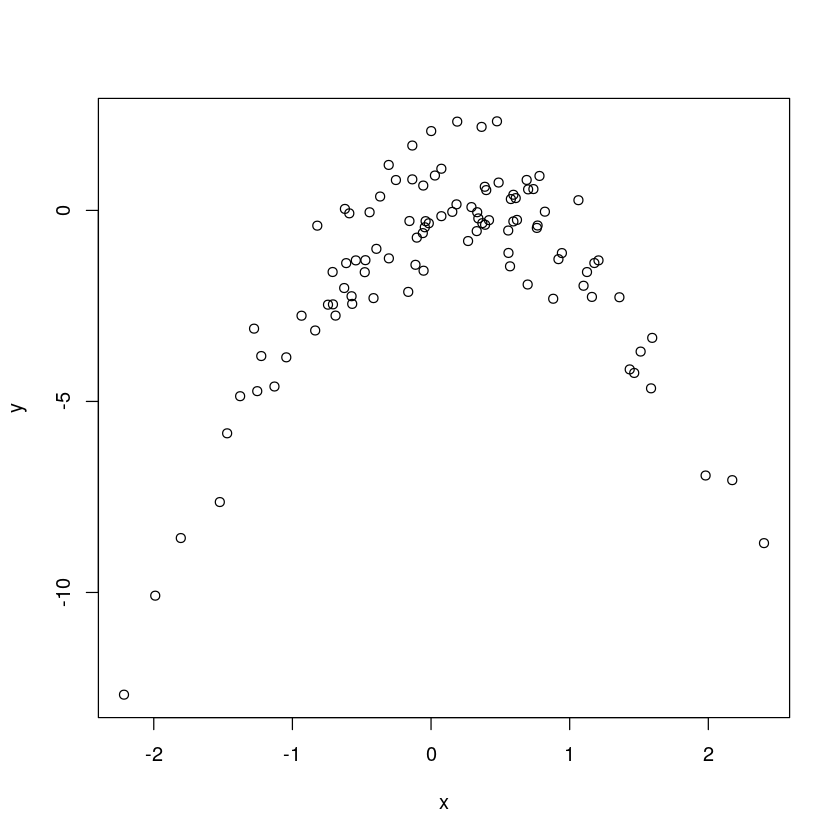

In [15]:
plot(y~x)

#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

  i. $Y = \beta_0 + \beta_1 X + \varepsilon$

  ii. $Y = \beta_0 + \beta_1 X + \beta_2X^2 + \varepsilon$  

  iii. $Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3X^3 + \varepsilon$  
  
  iv. $Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \varepsilon$.  

#### Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `X` and `Y`.

In [16]:
# long version
set.seed(1)
df = data.frame(y,x)
loopf = function(i){
    model = lm(y~poly(x,n),df,subset=-i)
    pred = predict(model, df[i,], type='response')
    SE = (df[i,'y'] - pred)^2
    return(SE)
}
CV=c(0,0,0,0)
for (n in 1:4){
    CV[n] = mean(sapply(1:100, loopf))
}
CV

[1] 7.2881616 0.9374236 0.9566218 0.9539049

In [17]:
# short vesion using Hat matrix diagonal
set.seed(1)
myCV = function(ns=1:4){
    sapply(ns, function(n){
        model = lm(y~poly(x,n))
        return(mean(((y-fitted(model))/(1-hatvalues(model)))^2))
        })}
(CV = myCV())


[1] 7.2881616 0.9374236 0.9566218 0.9539049

#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [18]:
# There is nothing random in the CV procedure. results will differ only if a new sample is generated
cat('Seed 1 sample and CV:    ', CV)
set.seed(2)
CV = myCV()
cat('\nSeed 1 sample, Seed 2 CV:', CV)

set.seed(2)
x = rnorm(100, 0, 1)
y = x-2*x^2+rnorm(100, 0, 1)
CV = myCV()
cat('\nSeed 2 sample and CV:    ', CV)

set.seed(1)
x = rnorm(100, 0, 1)
y = x-2*x^2+rnorm(100, 0, 1)
CV = myCV()

Seed 1 sample and CV:     7.288162 0.9374236 0.9566218 0.9539049
Seed 1 sample, Seed 2 CV: 7.288162 0.9374236 0.9566218 0.9539049
Seed 2 sample and CV:     9.858301 1.00441 1.01803 1.035601

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

In [19]:
which(CV==min(CV))
print('Expected is 2, which is the true data generation process.')

[1] 2

[1] "Expected is 2, which is the true data generation process."


#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

*We get $\beta_1$ and $\beta_2$ significant, but the values are way off the true generating process. We reject $\beta_0 = 0$, which is incorrect. LOOCV selects the same model specification as statistical significance of coefficients for this sample. Python results will differ because the random generating process is different.*

In [20]:
for(n in 1:4) print(summary(lm(y~poly(x,n))))


Call:
lm(formula = y ~ poly(x, n))

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5161 -0.6800  0.6812  1.5491  3.8183 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.550      0.260  -5.961 3.95e-08 ***
poly(x, n)     6.189      2.600   2.380   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.6 on 98 degrees of freedom
Multiple R-squared:  0.05465,	Adjusted R-squared:  0.045 
F-statistic: 5.665 on 1 and 98 DF,  p-value: 0.01924


Call:
lm(formula = y ~ poly(x, n))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9650 -0.6254 -0.1288  0.5803  2.2700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, n)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, n)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.958 on 97 

In [30]:
for(n in 1:4) print(summary(lm(y~poly(x,n)+0)))


Call:
lm(formula = y ~ poly(x, n) + 0)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0661  -2.2301  -0.8688  -0.0009   2.2683 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
poly(x, n)    6.189      3.020   2.049   0.0431 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.02 on 99 degrees of freedom
Multiple R-squared:  0.0407,	Adjusted R-squared:  0.03101 
F-statistic:   4.2 on 1 and 99 DF,  p-value: 0.04307


Call:
lm(formula = y ~ poly(x, n) + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5151 -2.1754 -1.6788 -0.9697  0.7200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
poly(x, n)1    6.189      1.833   3.376  0.00105 ** 
poly(x, n)2  -23.948      1.833 -13.065  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.833 on 98 degrees of freedom
Multiple R-squared:  0.6501,	Adjusted R-squared:  0.643 
F-statistic: 91.

### 9. We will now consider the Boston housing data set, from the `MASS` library.

#### (a) Based on this data set, provide an estimate for the population mean of `medv` . Call this estimate $\hat\mu$.

In [21]:
require(MASS)
(hatmu = mean(Boston$medv))

Loading required package: MASS


[1] 22.53281

#### (b) Provide an estimate of the standard error of $\hat\mu$. Interpret this result. Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [22]:
(hatmu_se = sd(Boston$medv)/sqrt(nrow(Boston)))

[1] 0.4088611

#### (c) Now estimate the standard error of $\hat\mu$ using the bootstrap. How does this compare to your answer from (b)?

In [23]:
require(boot)
bootf = function(data,index) mean(data[index,'medv'])
(bs = boot(Boston, bootf, 1000))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = bootf, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.008186957   0.4100113

#### (d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of `medv`. Compare it to the results obtained using `t.test(Boston$medv)`. Hint: You can approximate a 95% confidence interval using the formula $\left[\hat\mu − 2SE(\hat\mu), \hat\mu + 2SE(\hat\mu)\right]$.

In [24]:
t.test(Boston$medv)


	One Sample t-test

data:  Boston$medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [25]:
mean(bs$t)+sd(bs$t)*c(-1,1)

[1] 22.13098 22.95100

#### (e) Based on this data set, provide an estimate, $\hat\mu_{med}$, for the median value of `medv` in the population.

In [26]:
(hatmedian = median(Boston$medv))

[1] 21.2

#### (f) We now would like to estimate the standard error of $\hat\mu_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.  

In [27]:
bootf = function(data,index) median(data[index,'medv'])
(bs = boot(Boston, bootf, 1000))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = bootf, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0392    0.377579

#### (g) Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston suburbs. Call this quantity $\hat\mu_{0.1}$ . (You can use the `quantile()` function.)

In [28]:
quantile(Boston$medv, 0.1)

10% 
12.75

#### (h) Use the bootstrap to estimate the standard error of $\hat\mu_{0.1}$. Comment on your findings.

In [29]:
bootf = function(data,index) quantile(data[index,'medv'],0.10)
(bs = boot(Boston, bootf, 1000))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston, statistic = bootf, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  0.0193   0.4921328